In [1]:
#%pip install -r requirements.txt

import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
interest_rate = pd.read_csv('./data/interest_rate.csv')
energy_price = pd.read_csv('./data/energy_price.csv')
cpi = pd.read_csv('./data/cpi.csv')

In [3]:
interest_rate.head(1000)

location  interest_rate_long_term  year  month  interest_rate_short_term  \
0        AUS                 7.177895  2000      1                      5.66   
1        AUS                 6.957619  2000      2                      5.80   
2        AUS                 6.570435  2000      3                      5.89   
3        AUS                 6.264706  2000      4                      6.04   
4        AUS                 6.465652  2000      5                      6.31   
..       ...                      ...   ...    ...                       ...   
995      USA                 2.530000  2014      9                      0.12   
996      USA                 2.300000  2014     10                      0.12   
997      USA                 2.330000  2014     11                      0.13   
998      USA                 2.210000  2014     12                      0.15   
999      USA                 1.880000  2015      1                      0.16   

     interest_rate_immediate_term  
0                            5.00  
1                            5.48  
2                            5.50  
3                            5.72  
4                            5.98  
..                            ...  
995                          0.09  
996                          0.09  
997                          0.09  
998                          0.12  
999                          0.11  

[1000 rows x 6 columns]

In [4]:
cpi.head(1000)

location   cpi-index  year  month
0        AUS    3.700000  1948      9
1        AUS    3.733333  1948     10
2        AUS    3.766667  1948     11
3        AUS    3.800000  1948     12
4        AUS    3.833333  1949      1
..       ...         ...   ...    ...
995      USA  174.100000  2000     11
996      USA  174.000000  2000     12
997      USA  175.100000  2001      1
998      USA  175.800000  2001      2
999      USA  176.200000  2001      3

[1000 rows x 4 columns]

In [5]:
energy_price.head(1000)

energy_price  year  month  energy_price_lag_1m  energy_price_lag_2m  \
0           30.37  2004      1                29.64               28.515   
1           29.73  2004      2                30.37               29.640   
2           32.30  2004      3                29.73               30.370   
3           32.54  2004      4                32.30               29.730   
4           36.40  2004      5                32.54               32.300   
..            ...   ...    ...                  ...                  ...   
603        109.55  2022      5               101.78              108.500   
604        114.84  2022      6               109.55              101.780   
605        101.62  2022      7               114.84              109.550   
606         93.67  2022      8               101.62              114.840   
607         84.26  2022      9                93.67              101.620   

     energy_price_lag_3m  energy_price_lag_4m  energy_price_lag_5m  \
0                 28.160               26.360               28.800   
1                 28.515               28.160               26.360   
2                 29.640               28.515               28.160   
3                 30.370               29.640               28.515   
4                 29.730               30.370               29.640   
..                   ...                  ...                  ...   
603               91.640               83.220               71.710   
604              108.500               91.640               83.220   
605              101.780              108.500               91.640   
606              109.550              101.780              108.500   
607              114.840              109.550              101.780   

     energy_price_lag_6m  energy_price_lag_7m  energy_price_lag_8m  \
0                 27.380                26.70                26.17   
1                 28.800                27.38                26.70   
2                 26.360                28.80                27.38   
3                 28.160                26.36                28.80   
4                 28.515                28.16                26.36   
..                   ...                  ...                  ...   
603               79.150                81.48                71.65   
604               71.710                79.15                81.48   
605               83.220                71.71                79.15   
606               91.640                83.22                71.71   
607              108.500                91.64                83.22   

     energy_price_lag_9m  energy_price_lag_10m  energy_price_lag_11m  \
0                  25.38                 29.80                31.845   
1                  26.17                 25.38                29.800   
2                  26.70                 26.17                25.380   
3                  27.38                 26.70                26.170   
4                  28.80                 27.38                26.700   
..                   ...                   ...                   ...   
603                67.73                 72.49                71.380   
604                71.65                 67.73                72.490   
605                81.48                 71.65                67.730   
606                79.15                 81.48                71.650   
607                71.71                 79.15                81.480   

     energy_price_lag_12m location  
0                  30.430      AUS  
1                  31.845      AUS  
2                  29.800      AUS  
3                  25.380      AUS  
4                  26.170      AUS  
..                    ...      ...  
603                65.170      USA  
604                71.380      USA  
605                72.490      USA  
606                67.730      USA  
607                71.650      USA  

[608 rows x 16 columns]

In [6]:
df = interest_rate.merge(cpi, on=['location', 'year', 'month'], suffixes=('', '_delme'))
df = df.merge(energy_price, on=['location', 'year', 'month'], suffixes=('', '_delme'))
df = df[[c for c in df.columns if not c.endswith('_delme')]]

In [7]:
df.head(1000)

location  interest_rate_long_term  year  month  interest_rate_short_term  \
0        AUS                 5.700500  2004      1                      5.55   
1        AUS                 5.620500  2004      2                      5.57   
2        AUS                 5.415435  2004      3                      5.51   
3        AUS                 5.803000  2004      4                      5.54   
4        AUS                 5.958095  2004      5                      5.51   
..       ...                      ...   ...    ...                       ...   
492      USA                 2.900000  2022      5                      1.33   
493      USA                 3.140000  2022      6                      1.87   
494      USA                 2.900000  2022      7                      2.50   
495      USA                 2.900000  2022      8                      2.76   
496      USA                 3.520000  2022      9                      3.21   

     interest_rate_immediate_term   cpi-index  energy_price  \
0                            5.25   79.733333         30.37   
1                            5.25   79.966667         29.73   
2                            5.25   80.200000         32.30   
3                            5.25   80.333333         32.54   
4                            5.25   80.466667         36.40   
..                            ...         ...           ...   
492                          0.77  292.296000        109.55   
493                          1.21  296.311000        114.84   
494                          1.68  296.276000        101.62   
495                          2.33  296.171000         93.67   
496                          2.56  296.808000         84.26   

     energy_price_lag_1m  energy_price_lag_2m  energy_price_lag_3m  \
0                  29.64               28.515               28.160   
1                  30.37               29.640               28.515   
2                  29.73               30.370               29.640   
3                  32.30               29.730               30.370   
4                  32.54               32.300               29.730   
..                   ...                  ...                  ...   
492               101.78              108.500               91.640   
493               109.55              101.780              108.500   
494               114.84              109.550              101.780   
495               101.62              114.840              109.550   
496                93.67              101.620              114.840   

     energy_price_lag_4m  energy_price_lag_5m  energy_price_lag_6m  \
0                 26.360               28.800               27.380   
1                 28.160               26.360               28.800   
2                 28.515               28.160               26.360   
3                 29.640               28.515               28.160   
4                 30.370               29.640               28.515   
..                   ...                  ...                  ...   
492               83.220               71.710               79.150   
493               91.640               83.220               71.710   
494              108.500               91.640               83.220   
495              101.780              108.500               91.640   
496              109.550              101.780              108.500   

     energy_price_lag_7m  energy_price_lag_8m  energy_price_lag_9m  \
0                  26.70                26.17                25.38   
1                  27.38                26.70                26.17   
2                  28.80                27.38                26.70   
3                  26.36                28.80                27.38   
4                  28.16                26.36                28.80   
..                   ...                  ...                  ...   
492                81.48                71.65                67.73   
493                79.15                81.4

In [8]:
#Columns present in the dataset
df.columns

Index(['location', 'interest_rate_long_term', 'year', 'month',
       'interest_rate_short_term', 'interest_rate_immediate_term', 'cpi-index',
       'energy_price', 'energy_price_lag_1m', 'energy_price_lag_2m',
       'energy_price_lag_3m', 'energy_price_lag_4m', 'energy_price_lag_5m',
       'energy_price_lag_6m', 'energy_price_lag_7m', 'energy_price_lag_8m',
       'energy_price_lag_9m', 'energy_price_lag_10m', 'energy_price_lag_11m',
       'energy_price_lag_12m'],
      dtype='object')

In [9]:
#Checking for null values
df.isnull().sum()

location                        0
interest_rate_long_term         0
year                            0
month                           0
interest_rate_short_term        0
interest_rate_immediate_term    0
cpi-index                       0
energy_price                    0
energy_price_lag_1m             0
energy_price_lag_2m             0
energy_price_lag_3m             0
energy_price_lag_4m             0
energy_price_lag_5m             0
energy_price_lag_6m             0
energy_price_lag_7m             0
energy_price_lag_8m             0
energy_price_lag_9m             0
energy_price_lag_10m            0
energy_price_lag_11m            0
energy_price_lag_12m            0
dtype: int64

In [10]:
#Checking datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 0 to 496
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   location                      497 non-null    object 
 1   interest_rate_long_term       497 non-null    float64
 2   year                          497 non-null    int64  
 3   month                         497 non-null    int64  
 4   interest_rate_short_term      497 non-null    float64
 5   interest_rate_immediate_term  497 non-null    float64
 6   cpi-index                     497 non-null    float64
 7   energy_price                  497 non-null    float64
 8   energy_price_lag_1m           497 non-null    float64
 9   energy_price_lag_2m           497 non-null    float64
 10  energy_price_lag_3m           497 non-null    float64
 11  energy_price_lag_4m           497 non-null    float64
 12  energy_price_lag_5m           497 non-null    float64
 13  energ

In [11]:
#Stats of data
df.describe()

interest_rate_long_term         year       month  \
count               497.000000   497.000000  497.000000   
mean                  3.471594  2011.766600    6.450704   
std                   1.509215     6.156056    3.441048   
min                   0.620000  2000.000000    1.000000   
25%                   2.300000  2007.000000    3.000000   
50%                   3.320000  2012.000000    6.000000   
75%                   4.730000  2017.000000    9.000000   
max                   6.660000  2022.000000   12.000000   

       interest_rate_short_term  interest_rate_immediate_term   cpi-index  \
count                497.000000                    497.000000  497.000000   
mean                   2.528913                      2.335614  167.686885   
std                    2.141823                      2.110917   64.538401   
min                    0.010000                      0.050000   79.733333   
25%                    0.520000                      0.220000  105.733333   
50%                    2.030000                      1.750000  177.800000   
75%                    4.370000                      4.240000  229.392000   
max                    7.900000                      7.250000  296.808000   

       energy_price  energy_price_lag_1m  energy_price_lag_2m  \
count    497.000000           497.000000           497.000000   
mean      66.367072            66.091439            65.763863   
std       26.332847            26.441701            26.524245   
min       17.730000            16.550000            16.550000   
25%       45.950000            45.660000            45.190000   
50%       62.820000            62.385000            62.330000   
75%       86.660000            86.410000            86.330000   
max      133.930000           133.930000           133.930000   

       energy_price_lag_3m  energy_price_lag_4m  energy_price_lag_5m  \
count           497.000000           497.000000           497.000000   
mean             65.428853            65.057525            64.714940   
std              26.533842            26.459794            26.413979   
min              16.550000            16.550000            16.550000   
25%              45.180000            44.940000            44.700000   
50%              62.230000            62.030000            61.715000   
75%              85.610000            84.400000            83.220000   
max             133.930000           133.930000           133.930000   

       energy_price_lag_6m  energy_price_lag_7m  energy_price_lag_8m  \
count           497.000000           497.000000           497.000000   
mean             64.398280            64.036107            63.756308   
std              26.421322            26.392907            26.464368   
min              16.550000            16.550000            16.550000   
25%              44.605000            43.930000            43.690000   
50%              61.075000            60.830000            60.125000   
75%              82.555000            82.410000            81.900000   
max             133.930000           133.930000           133.930000   

       energy_price_lag_9m  energy_price_lag_10m  energy_price_lag_11m  \
count           497.000000            497.000000            497.000000   
mean             63.495905             63.296288             63.049085   
std              26.568604             26.692324             26.808342   
min              16.550000             14.660000             12.010000   
25%              43.330000             42.880000             42.865000   
50%              59.820000             59.630000             59.370000   
75%              81.395000             81.395000             81.240000   
max             133.930000            133.930000            133.930000   

       energy_price_lag_12m  
count            497.000000  
mean              62.799306  
std               26.916281  
min               12.010000  
25%               42.440000  
50%               59.270000  
75%               79

In [12]:
df.head(1000)

location  interest_rate_long_term  year  month  interest_rate_short_term  \
0        AUS                 5.700500  2004      1                      5.55   
1        AUS                 5.620500  2004      2                      5.57   
2        AUS                 5.415435  2004      3                      5.51   
3        AUS                 5.803000  2004      4                      5.54   
4        AUS                 5.958095  2004      5                      5.51   
..       ...                      ...   ...    ...                       ...   
492      USA                 2.900000  2022      5                      1.33   
493      USA                 3.140000  2022      6                      1.87   
494      USA                 2.900000  2022      7                      2.50   
495      USA                 2.900000  2022      8                      2.76   
496      USA                 3.520000  2022      9                      3.21   

     interest_rate_immediate_term   cpi-index  energy_price  \
0                            5.25   79.733333         30.37   
1                            5.25   79.966667         29.73   
2                            5.25   80.200000         32.30   
3                            5.25   80.333333         32.54   
4                            5.25   80.466667         36.40   
..                            ...         ...           ...   
492                          0.77  292.296000        109.55   
493                          1.21  296.311000        114.84   
494                          1.68  296.276000        101.62   
495                          2.33  296.171000         93.67   
496                          2.56  296.808000         84.26   

     energy_price_lag_1m  energy_price_lag_2m  energy_price_lag_3m  \
0                  29.64               28.515               28.160   
1                  30.37               29.640               28.515   
2                  29.73               30.370               29.640   
3                  32.30               29.730               30.370   
4                  32.54               32.300               29.730   
..                   ...                  ...                  ...   
492               101.78              108.500               91.640   
493               109.55              101.780              108.500   
494               114.84              109.550              101.780   
495               101.62              114.840              109.550   
496                93.67              101.620              114.840   

     energy_price_lag_4m  energy_price_lag_5m  energy_price_lag_6m  \
0                 26.360               28.800               27.380   
1                 28.160               26.360               28.800   
2                 28.515               28.160               26.360   
3                 29.640               28.515               28.160   
4                 30.370               29.640               28.515   
..                   ...                  ...                  ...   
492               83.220               71.710               79.150   
493               91.640               83.220               71.710   
494              108.500               91.640               83.220   
495              101.780              108.500               91.640   
496              109.550              101.780              108.500   

     energy_price_lag_7m  energy_price_lag_8m  energy_price_lag_9m  \
0                  26.70                26.17                25.38   
1                  27.38                26.70                26.17   
2                  28.80                27.38                26.70   
3                  26.36                28.80                27.38   
4                  28.16                26.36                28.80   
..                   ...                  ...                  ...   
492                81.48                71.65                67.73   
493                79.15                81.4

interest_rate_long_term      year     month  \
interest_rate_long_term                      1.000000 -0.899694 -0.030575   
year                                        -0.899694  1.000000 -0.029435   
month                                       -0.030575 -0.029435  1.000000   
interest_rate_short_term                     0.933211 -0.912786 -0.007201   
interest_rate_immediate_term                 0.923239 -0.925774 -0.004744   
cpi-index                                   -0.873221  0.993536  0.026936   
energy_price                                 0.194351  0.050140  0.012043   
energy_price_lag_1m                          0.177285  0.052255  0.060780   
energy_price_lag_2m                          0.151110  0.053877  0.091323   
energy_price_lag_3m                          0.121485  0.054717  0.095230   
energy_price_lag_4m                          0.088851  0.054241  0.082720   
energy_price_lag_5m                          0.058278  0.054585  0.058464   
energy_price_lag_6m                          0.031018  0.058030  0.018926   
energy_price_lag_7m                          0.007347  0.059059 -0.012114   
energy_price_lag_8m                         -0.013741  0.064913 -0.030986   
energy_price_lag_9m                         -0.031004  0.072247 -0.039408   
energy_price_lag_10m                        -0.045043  0.080532 -0.028924   
energy_price_lag_11m                        -0.057723  0.085757 -0.010970   
energy_price_lag_12m                        -0.070840  0.090095  0.021761   

                              interest_rate_short_term  \
interest_rate_long_term                       0.933211   
year                                         -0.912786   
month                                        -0.007201   
interest_rate_short_term                      1.000000   
interest_rate_immediate_term                  0.995736   
cpi-index                                    -0.894623   
energy_price                                  0.155064   
energy_price_lag_1m                           0.153822   
energy_price_lag_2m                           0.145292   
energy_price_lag_3m                           0.130007   
energy_price_lag_4m                           0.109417   
energy_price_lag_5m                           0.084418   
energy_price_lag_6m                           0.056903   
energy_price_lag_7m                           0.029302   
energy_price_lag_8m                           0.001033   
energy_price_lag_9m                          -0.026776   
energy_price_lag_10m                         -0.052917   
energy_price_lag_11m                         -0.076468   
energy_price_lag_12m                         -0.098501   

                              interest_rate_immediate_term  cpi-index  \
interest_rate_long_term                           0.923239  -0.873221   
year                                             -0.925774   0.993536   
month                                            -0.004744   0.026936   
interest_rate_short_term                          0.995736  -0.894623   
interest_rate_immediate_term                      1.000000  -0.909603   
cpi-index                                        -0.909603   1.000000   
energy_price                                      0.145414   0.116277   
energy_price_lag_1m                               0.147075   0.125025   
energy_price_lag_2m                               0.142525   0.130564   
energy_price_lag_3m                               0.131752   0.131661   
energy_price_lag_4m                               0.117927   0.128639   
energy_price_lag_5m                               0.098402   0.125253   
energy_price_lag_6m                               0.075492   0.124132   
energy_price_lag_7m                               0.050793   0.120325   
energy_price_lag_8m                               0.023753   0.122850   
energy_price_lag_9m                              -0.003332   0.127760   
energy_price_lag_10m                             -0.029096   0.135515   
energy_price_l

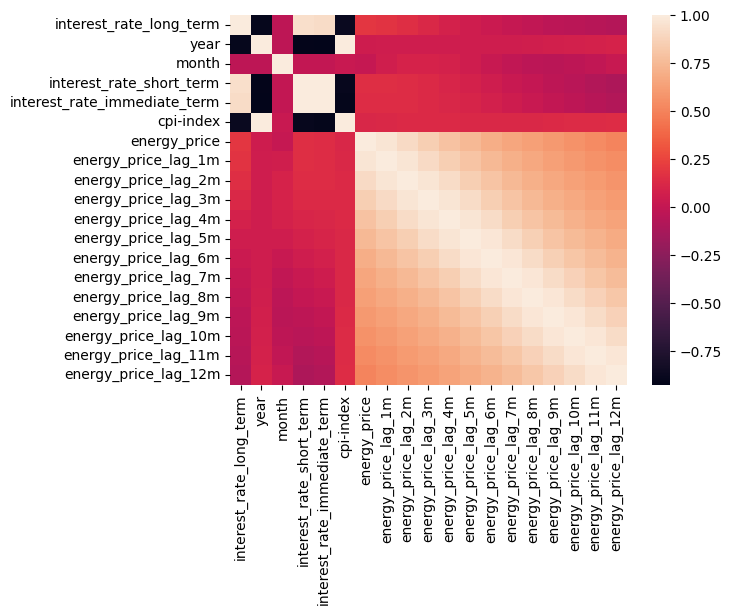

In [13]:
method='pearson'

df_au = df[df['location'] == 'AUS']

sns.heatmap(df_au.corr(numeric_only=True,method=method))
df_au.corr(numeric_only=True,method=method)

interest_rate_long_term      year     month  \
interest_rate_long_term                      1.000000 -0.863408 -0.053153   
year                                        -0.863408  1.000000 -0.020812   
month                                       -0.053153 -0.020812  1.000000   
interest_rate_short_term                     0.767289 -0.544418 -0.001169   
interest_rate_immediate_term                 0.769266 -0.555717 -0.017956   
cpi-index                                   -0.827503  0.986641  0.019271   
energy_price                                -0.302359  0.368775  0.003808   
energy_price_lag_1m                         -0.304294  0.365886  0.049805   
energy_price_lag_2m                         -0.313401  0.360595  0.075716   
energy_price_lag_3m                         -0.331695  0.358856  0.077666   
energy_price_lag_4m                         -0.355485  0.356358  0.065699   
energy_price_lag_5m                         -0.378314  0.356345  0.045622   
energy_price_lag_6m                         -0.396765  0.358299  0.012243   
energy_price_lag_7m                         -0.412681  0.357939 -0.014930   
energy_price_lag_8m                         -0.425963  0.360888 -0.030923   
energy_price_lag_9m                         -0.435461  0.363941 -0.034567   
energy_price_lag_10m                        -0.444810  0.370252 -0.026613   
energy_price_lag_11m                        -0.453903  0.372866 -0.003498   
energy_price_lag_12m                        -0.465585  0.375191  0.025989   

                              interest_rate_short_term  \
interest_rate_long_term                       0.767289   
year                                         -0.544418   
month                                        -0.001169   
interest_rate_short_term                      1.000000   
interest_rate_immediate_term                  0.984704   
cpi-index                                    -0.511400   
energy_price                                 -0.250018   
energy_price_lag_1m                          -0.239589   
energy_price_lag_2m                          -0.236556   
energy_price_lag_3m                          -0.242372   
energy_price_lag_4m                          -0.256541   
energy_price_lag_5m                          -0.274270   
energy_price_lag_6m                          -0.293715   
energy_price_lag_7m                          -0.315145   
energy_price_lag_8m                          -0.334105   
energy_price_lag_9m                          -0.350707   
energy_price_lag_10m                         -0.367430   
energy_price_lag_11m                         -0.385443   
energy_price_lag_12m                         -0.405256   

                              interest_rate_immediate_term  cpi-index  \
interest_rate_long_term                           0.769266  -0.827503   
year                                             -0.555717   0.986641   
month                                            -0.017956   0.019271   
interest_rate_short_term                          0.984704  -0.511400   
interest_rate_immediate_term                      1.000000  -0.531066   
cpi-index                                        -0.531066   1.000000   
energy_price                                     -0.287792   0.456888   
energy_price_lag_1m                              -0.289416   0.456263   
energy_price_lag_2m                              -0.294825   0.448270   
energy_price_lag_3m                              -0.307738   0.440227   
energy_price_lag_4m                              -0.325018   0.428946   
energy_price_lag_5m                              -0.342485   0.420032   
energy_price_lag_6m                              -0.358605   0.413588   
energy_price_lag_7m                              -0.374898   0.405335   
energy_price_lag_8m                              -0.388522   0.402403   
energy_price_lag_9m                              -0.399426   0.401111   
energy_price_lag_10m                             -0.411227   0.404393   
energy_price_l

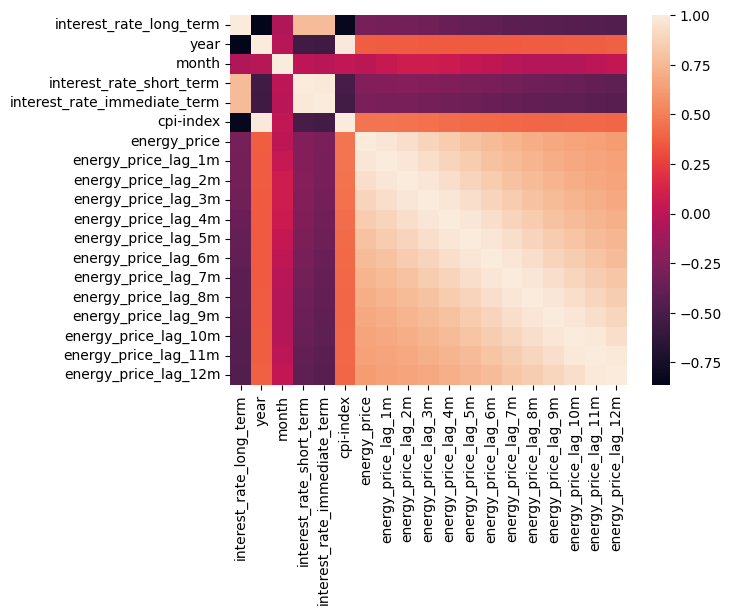

In [14]:
df_us = df[df['location'] == 'USA']

sns.heatmap(df_us.corr(numeric_only=True,method=method))
df_us.corr(numeric_only=True,method=method)

array([<AxesSubplot: xlabel='year,month'>,
       <AxesSubplot: xlabel='year,month'>], dtype=object)

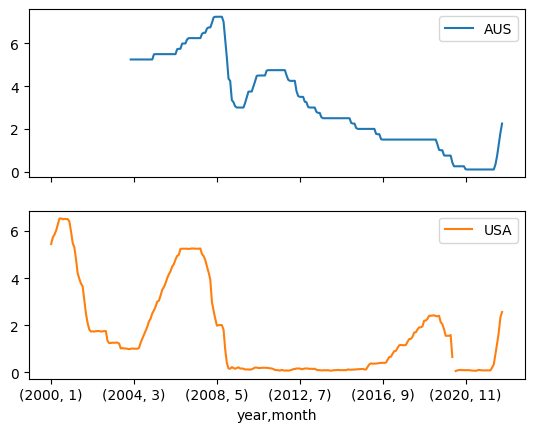

In [15]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='interest_rate_immediate_term'
              ).plot(subplots=True)

array([<AxesSubplot: xlabel='year,month'>,
       <AxesSubplot: xlabel='year,month'>], dtype=object)

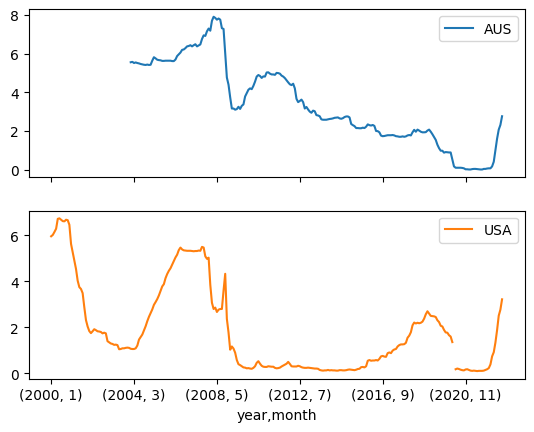

In [16]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='interest_rate_short_term'
              ).plot(subplots=True)

array([<AxesSubplot: xlabel='year,month'>,
       <AxesSubplot: xlabel='year,month'>], dtype=object)

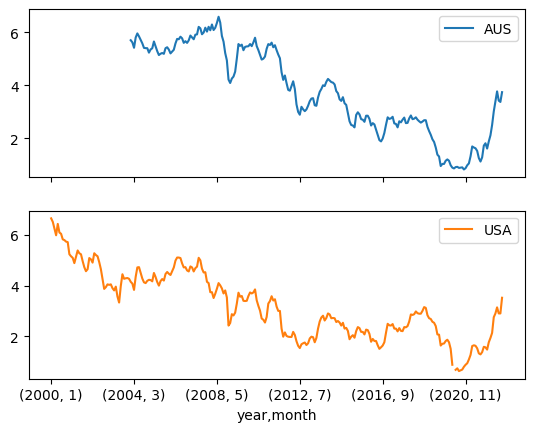

In [17]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='interest_rate_long_term'
              ).plot(subplots=True)

array([<AxesSubplot: xlabel='year,month'>,
       <AxesSubplot: xlabel='year,month'>], dtype=object)

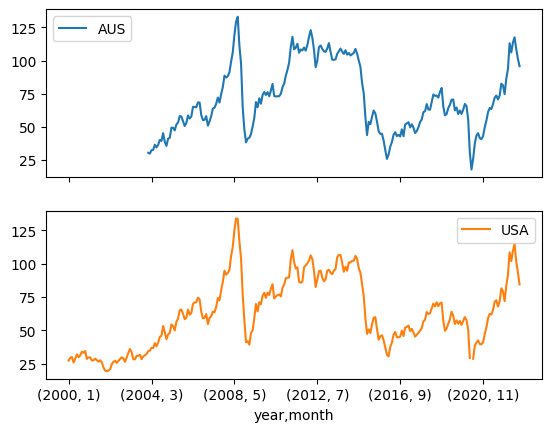

In [18]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='energy_price'
              ).plot(subplots=True)

array([<AxesSubplot: xlabel='year,month'>,
       <AxesSubplot: xlabel='year,month'>], dtype=object)

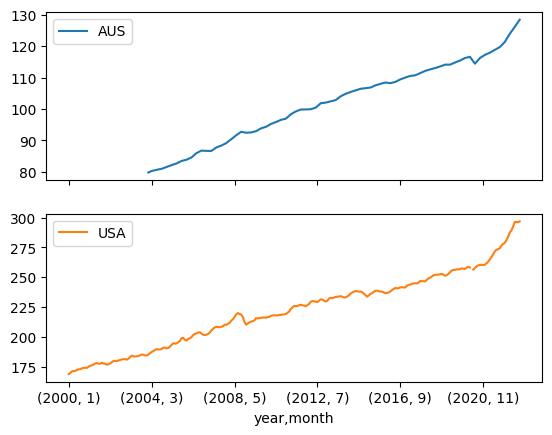

In [19]:
pd.pivot_table(df.reset_index(),
               index=['year','month'], columns='location', values='cpi-index'
              ).plot(subplots=True)

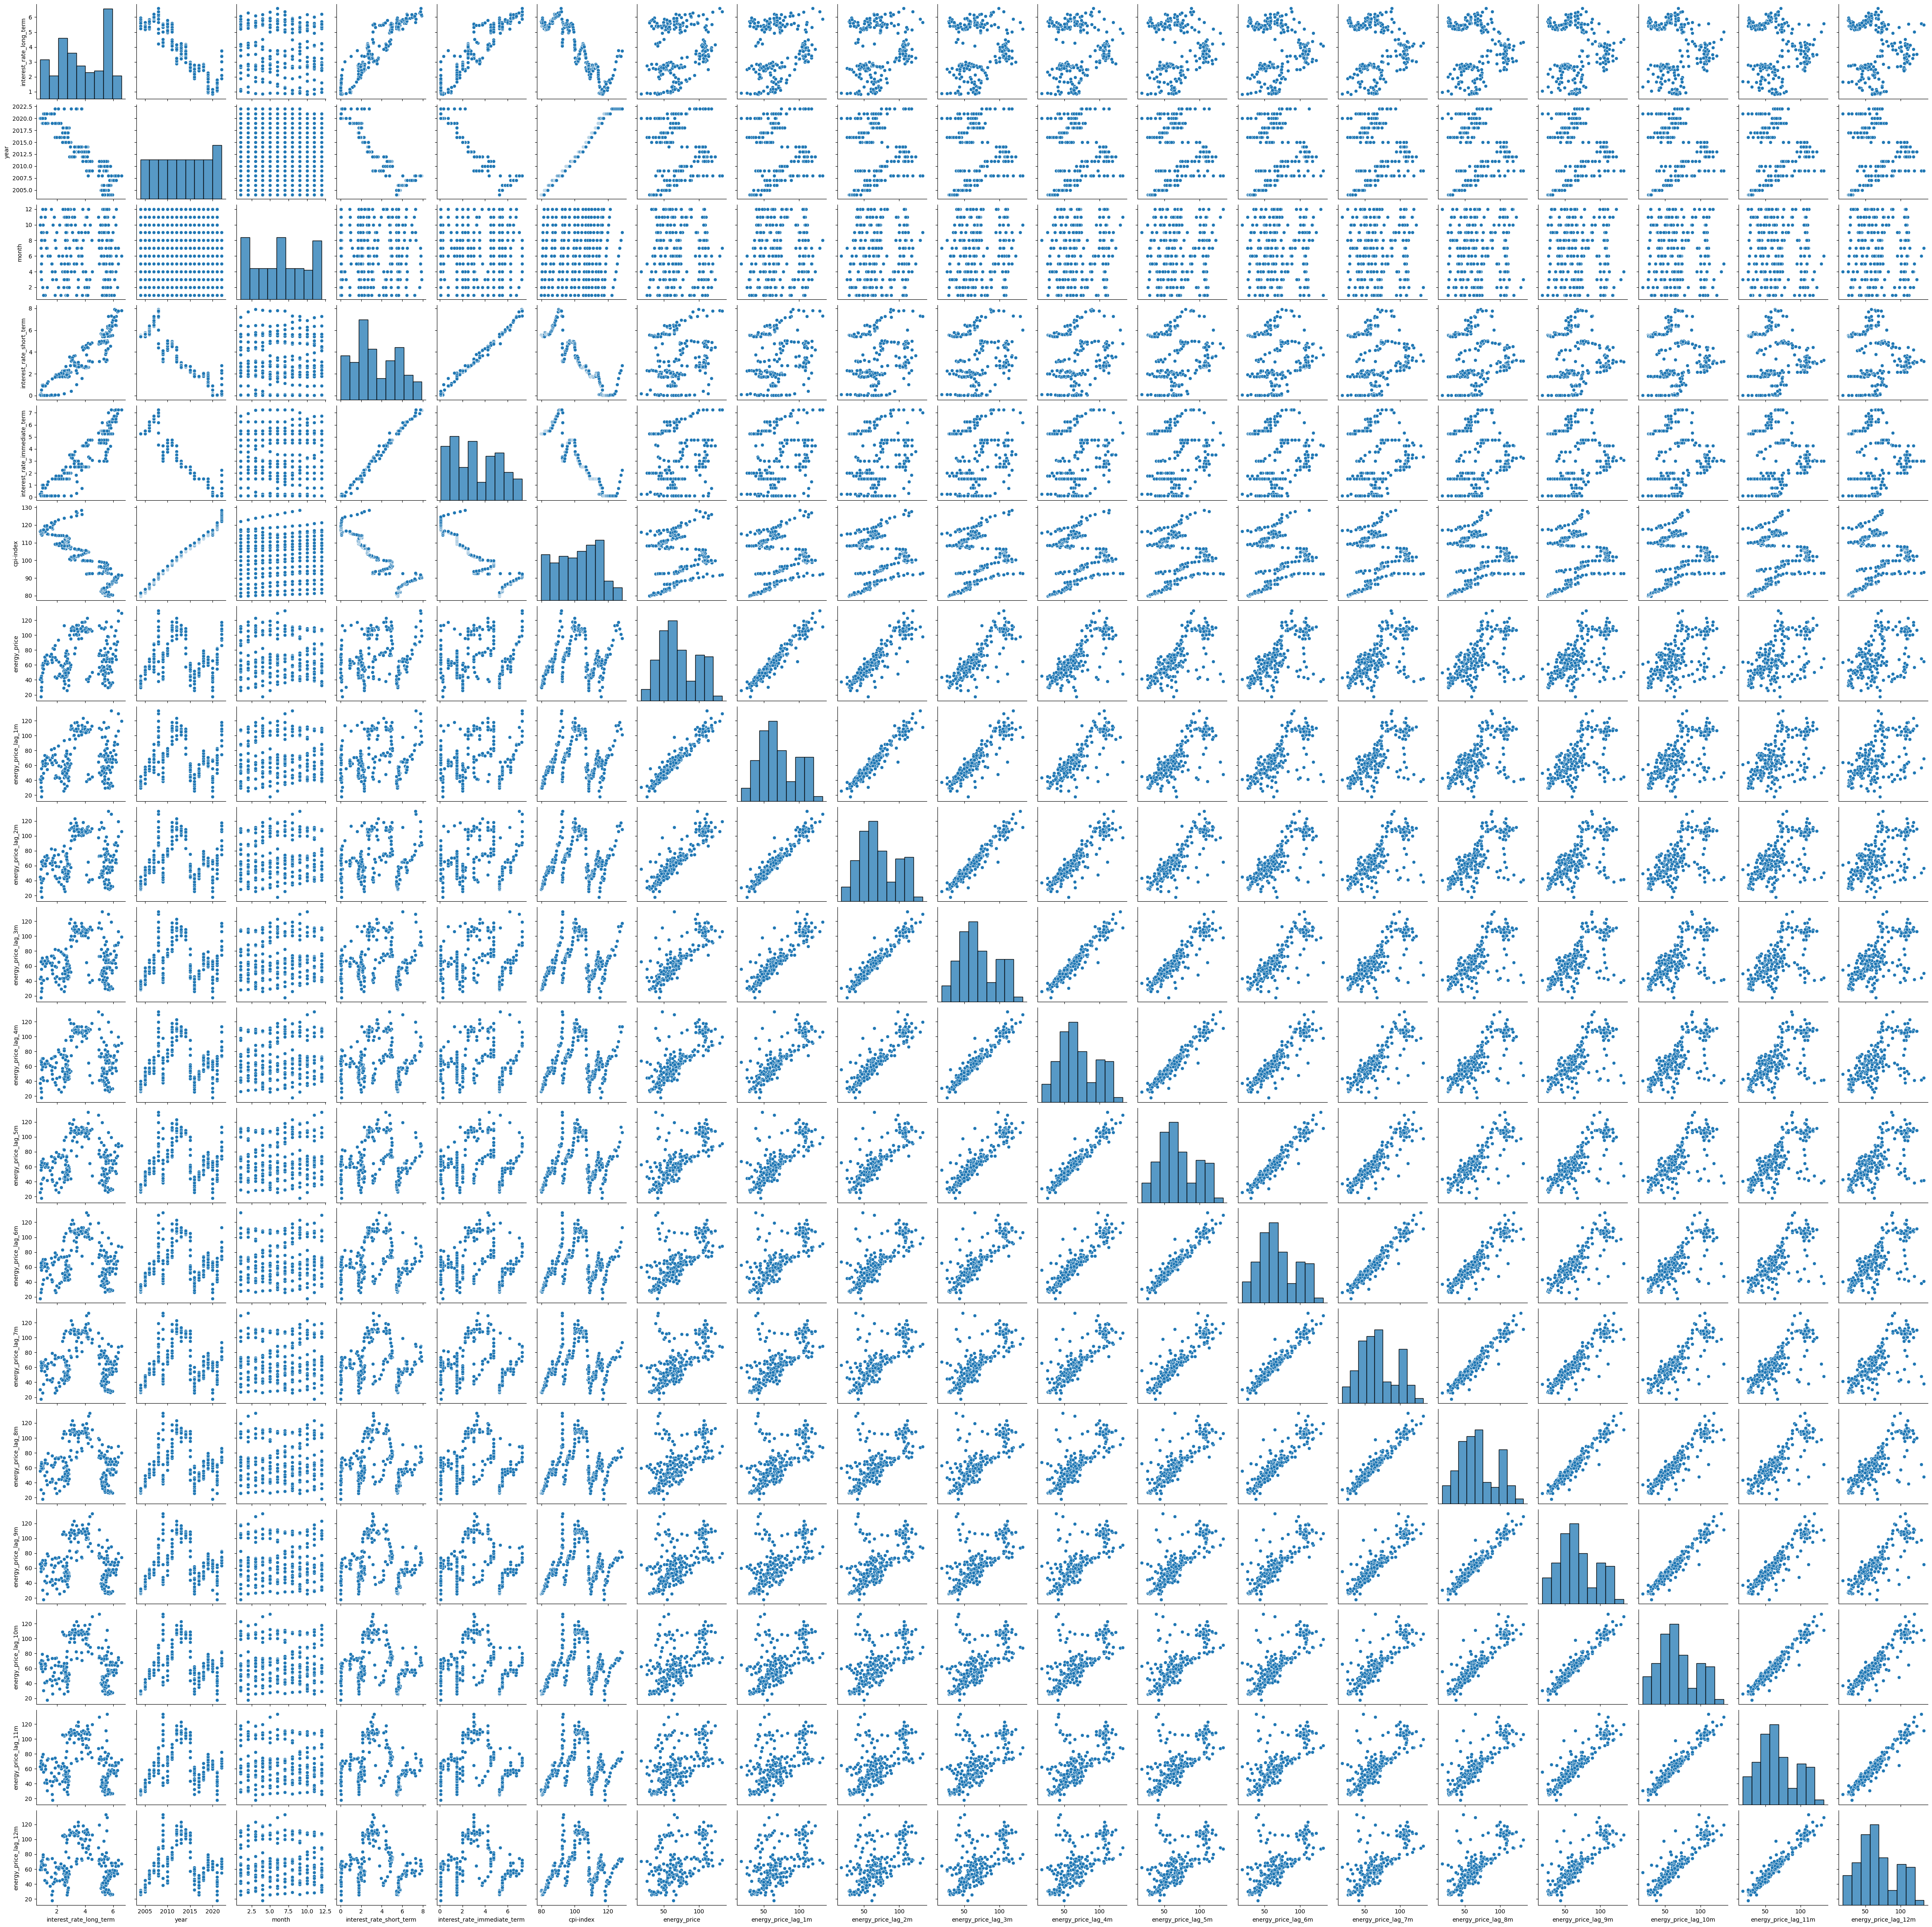

In [20]:
sns.pairplot(df_au)

In [ ]:
sns.pairplot(df_us)